# TITANIC SURVIVAL PREDICTION

## Importing Libraries

In [467]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## 1. Importing the Dataset

In [468]:
df = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

## 2. Explotatory Data Analysis

### 2.1 Checking dataset's features and shape

In [469]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [470]:
df.shape

(891, 12)

0    549
1    342
Name: Survived, dtype: int64


/Applications/work/anaconda3/envs/titanicsurvival/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Survived', ylabel='count'>

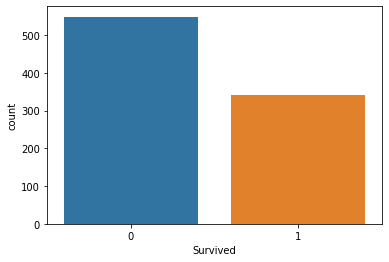

In [471]:
# Check the distribution of classifications
print(df['Survived'].value_counts())

# Visualize the above distribution
sns.countplot(df['Survived'], label='count')

### 2.2 Effect of features on Surival Rate

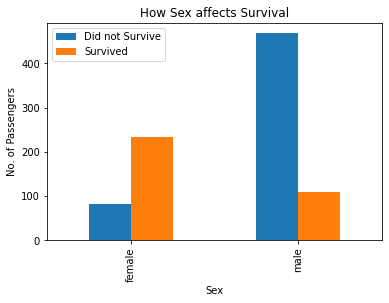

In [472]:
# Sex on Survival
def sex_vs_survival_graph():
    tab = pd.crosstab(df['Sex'], df['Survived'])
    tab.columns = ['Did not Survive', 'Survived']

    graph = tab.plot(y=['Did not Survive', 'Survived'], kind='bar')
    graph.set_ylabel('No. of Passengers')
    graph.set_title('How Sex affects Survival')

sex_vs_survival_graph()

        Did not Survive  Survived
Pclass                           
1                    80       136
2                    97        87
3                   372       119


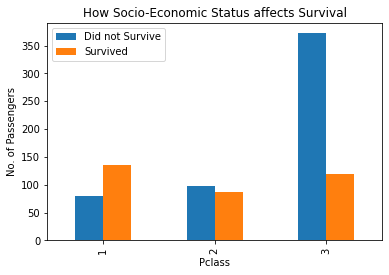

In [473]:
# Socio-Economic Status on Survival
def pclass_vs_survival_graph():
    tab = pd.crosstab(df['Pclass'], df['Survived'])
    tab.columns = ['Did not Survive', 'Survived']
    print(tab)
    graph = tab.plot(y=['Did not Survive', 'Survived'], kind='bar')
    graph.set_ylabel('No. of Passengers')
    graph.set_title('How Socio-Economic Status affects Survival')

pclass_vs_survival_graph()

          Did not Survive  Survived
Embarked                           
C                      75        93
Q                      47        30
S                     427       217


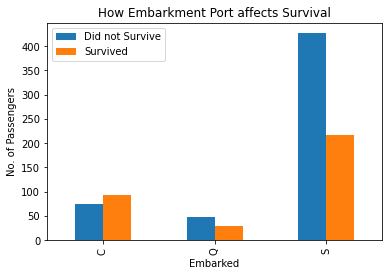

In [474]:
# Port of Embarkment on Survival
# C = Cherbourg, Q = Queenstown, S = Southampton
def port_vs_survival_graph():
    tab = pd.crosstab(df['Embarked'], df['Survived'])
    tab.columns = ['Did not Survive', 'Survived']
    print(tab)
    graph = tab.plot(y=['Did not Survive', 'Survived'], kind='bar')
    graph.set_ylabel('No. of Passengers')
    graph.set_title('How Embarkment Port affects Survival')

port_vs_survival_graph()

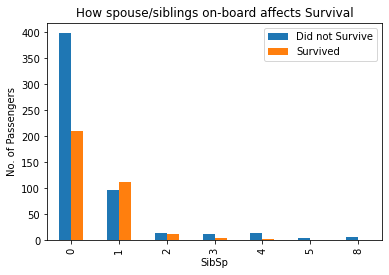

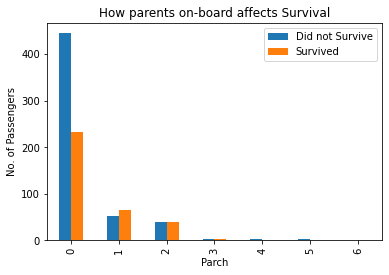

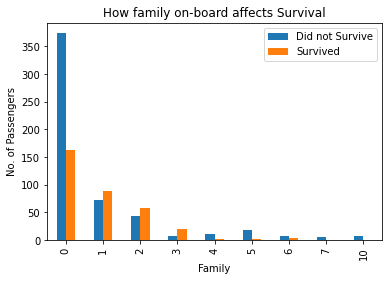

In [475]:
# How Family on-board affects Survival
def family_vs_suvival_graph():
    # Spouse/Siblings
    sib_tab = pd.crosstab(df['SibSp'], df['Survived'])
    sib_tab.columns = ['Did not Survive','Survived']
    
    sib_graph = sib_tab.plot(y=['Did not Survive','Survived'],kind='bar')
    sib_graph.set_title('How spouse/siblings on-board affects Survival')
    sib_graph.set_ylabel('No. of Passengers')
    
    # Parents
    parents_tab = pd.crosstab(df['Parch'], df['Survived'])
    parents_tab.columns = ['Did not Survive','Survived']
    
    parents_graph = parents_tab.plot(y=['Did not Survive','Survived'],kind='bar')
    parents_graph.set_title('How parents on-board affects Survival')
    parents_graph.set_ylabel('No. of Passengers')
    
    # Family (Spouse/Siblings + Parents)
    df['Family'] = df['SibSp'] + df['Parch']
    fam_tab = pd.crosstab(df['Family'], df['Survived'])
    fam_tab.columns = ['Did not Survive','Survived']
    
    fam_graph = fam_tab.plot(y=['Did not Survive','Survived'],kind='bar')
    fam_graph.set_title('How family on-board affects Survival')
    fam_graph.set_ylabel('No. of Passengers')
    
    

family_vs_suvival_graph()

Since it is seen that both spouse/siblings and parents have a similar graph, we can choose to add these columns together and present them as one, named 'Family'.

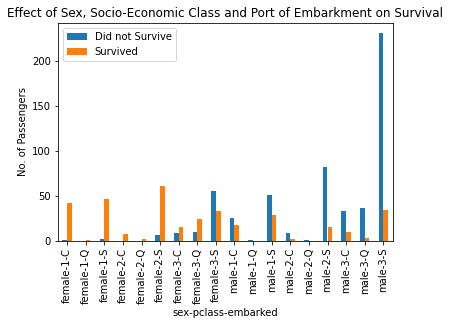

In [476]:
# Combining Sex, Socio-Economic Class and Embarkment Port to get a more concrete visualization
def sex_pclass_port_vs_survival_graph():
    df['sex-pclass-embarked'] = df['Sex'] + "-" + df['Pclass'].astype(str) + "-" + df['Embarked']
    sex_pclass_embarked_tab = pd.crosstab(df['sex-pclass-embarked'], df['Survived'])
    sex_pclass_embarked_tab.columns = ['Did not Survive', 'Survived']
    
    sex_pclass_embarked_graph = sex_pclass_embarked_tab.plot(y=['Did not Survive','Survived'],kind='bar')
    sex_pclass_embarked_graph.set_title('Effect of Sex, Socio-Economic Class and Port of Embarkment on Survival')
    sex_pclass_embarked_graph.set_ylabel('No. of Passengers')

sex_pclass_port_vs_survival_graph()

It can be observed that women have a higher survival rate than men, which is further boosted by their socio-economic class.

### 2.3 Feature Engineering

In [477]:
# Check the amount of missing data from the dataset.
df.isna().sum()

PassengerId              0
Survived                 0
Pclass                   0
Name                     0
Sex                      0
Age                    177
SibSp                    0
Parch                    0
Ticket                   0
Fare                     0
Cabin                  687
Embarked                 2
Family                   0
sex-pclass-embarked      2
dtype: int64

There are two passengers missing an Embarkment port - we can remove them since our dataset has nearly 890 passengers.

In [478]:
# Drop rows that have missing values under Embarked
df.dropna(axis=0, subset=['Embarked'], inplace=True)

# Verify that the rows have been deleted (expecting the removal of 2 rows)
df.shape

(889, 14)

In [479]:
# Drop columns that have string data that is not categorical in nature
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family,sex-pclass-embarked
0,0,3,male,22.0,1,0,7.2500,S,1,male-3-S
1,1,1,female,38.0,1,0,71.2833,C,1,female-1-C
2,1,3,female,26.0,0,0,7.9250,S,0,female-3-S
3,1,1,female,35.0,1,0,53.1000,S,1,female-1-S
4,0,3,male,35.0,0,0,8.0500,S,0,male-3-S


In [480]:
# Drop SibSp and Parch, since we have a Family column that contains their sum.
# Also drop sex-pclass-embarked because we needed that column to only visualize their impact on the outcome

df.drop(['SibSp', 'Parch', 'sex-pclass-embarked'], axis=1, inplace=True)

df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,0,3,male,22.0,7.2500,S,1
1,1,1,female,38.0,71.2833,C,1
2,1,3,female,26.0,7.9250,S,0
3,1,1,female,35.0,53.1000,S,1
4,0,3,male,35.0,8.0500,S,0


We are also dropping Cabin (which we earlier thought was useful) because the data is inconsistent.
It was earlier deduced that upper-class passengers would be given a cabin; however many in the dataset do not have one.
We cannot Impute these missing entries because they are categorical (Cabin sections are from A-G [with one exception of T]).

In [481]:
# Perform One Hot Encoding on Pclass, Sex and Embarked since they are categorical data
df = pd.get_dummies(data=df, columns=['Pclass','Sex', 'Embarked'], drop_first=True)

df.head()

,Survived,Age,Fare,Family,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,22.0,7.2500,1,0,1,1,0,1
1,1,38.0,71.2833,1,0,0,0,0,0
2,1,26.0,7.9250,0,0,1,0,0,1
3,1,35.0,53.1000,1,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,1,0,1


#### We now have three problems:
- Several passengers (177) dont have any value in Age. Should we use mean or median to fill these values?
- Some people (15) have paid 0 for their fare. Could it be that they are staff members?
- Do we divide the Fare of each person by the number of family members they have on board?

In [482]:
# Taking care of Fare per person
df['Fare'] = df['Fare']/(df['Family']+1)

In [483]:
df.head()

,Survived,Age,Fare,Family,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,22.0,3.62500,1,0,1,1,0,1
1,1,38.0,35.64165,1,0,0,0,0,0
2,1,26.0,7.92500,0,0,1,0,0,1
3,1,35.0,26.55000,1,0,0,0,0,1
4,0,35.0,8.05000,0,0,1,1,0,1


In [484]:
df_alt = df.copy()

In [485]:
# Taking care of missing values in Age column
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
df[:] = imputer.fit_transform(df)

In [486]:
# Some shenanigans so that rest of the columns retain their status 
age = df['Age']
df = df_alt.copy()
df['Age'] = age

### 2.4 Feature Correlation and Importance

In [487]:
# See correlation of data
df.corr()

,Survived,Age,Fare,Family,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
Survived,1.000000,-0.121513,0.217902,0.018277,0.095002,-0.320171,-0.541585,0.004536,-0.151777
Age,-0.121513,1.000000,0.137801,-0.302724,0.007654,-0.288967,0.155692,0.031923,-0.031314
Fare,0.217902,0.137801,1.000000,-0.097399,-0.101215,-0.363106,-0.110606,-0.095189,-0.180131
Family,0.018277,-0.302724,-0.097399,1.000000,-0.039263,0.069865,-0.203191,-0.059007,0.078197
Pclass_2,0.095002,0.007654,-0.101215,-0.039263,1.000000,-0.567432,-0.066459,-0.127705,0.190824
Pclass_3,-0.320171,-0.288967,-0.363106,0.069865,-0.567432,1.000000,0.134227,0.237035,-0.013594
Sex_male,-0.541585,0.155692,-0.110606,-0.203191,-0.066459,0.134227,1.000000,-0.075217,0.121405
Embarked_Q,0.004536,0.031923,-0.095189,-0.059007,-0.127705,0.237035,-0.075217,1.000000,-0.499261
Embarked_S,-0.151777,-0.031314,-0.180131,0.078197,0.190824,-0.013594,0.121405,-0.499261,1.000000


<AxesSubplot:>

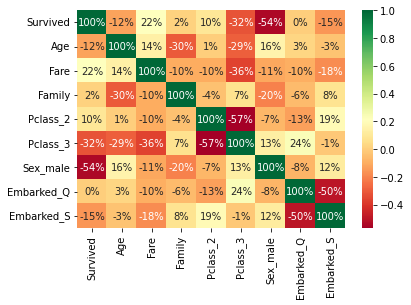

In [488]:
# Visualize this on a heatmap
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', fmt='.0%')

We can see that not a lot of correlation exists between features:
- There is some correlation between the port of Southamption and the sex of the passenger (12%)
- Same can be said about the lower-class passengers and Queenstown (24%)
- Similarly, middle-class passengers seem to have embarked from Southamption (19%)
- There is a relation between the Age of the Passenger and the fare of the Ticket.

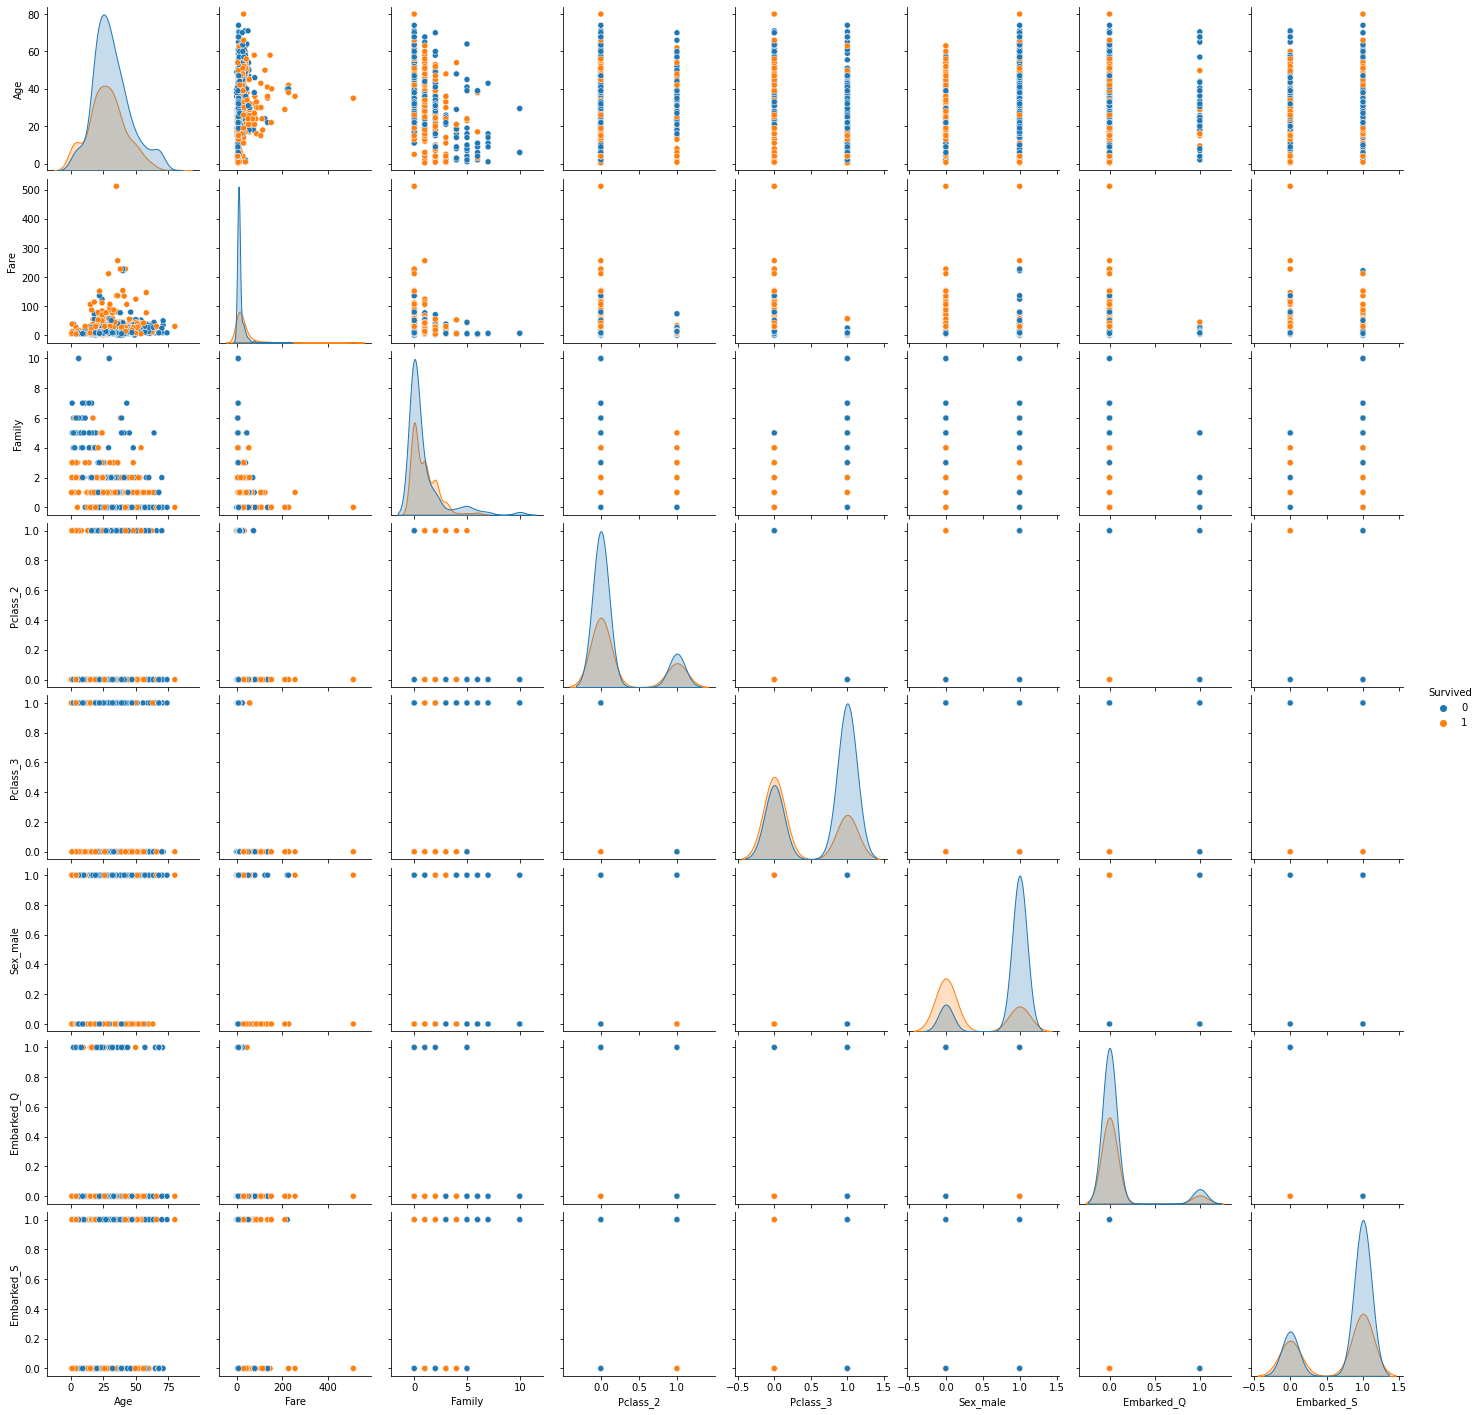

In [489]:
# Big Visualization
sns.pairplot(df, hue='Survived')

From this, you can make a guess about what model can fit this data. My personal guess would be Decision Tree or Random Forest.

## 3. Division and Allocation of Data

### 3.1 Dividing into Dependent and Independent Variables

In [490]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

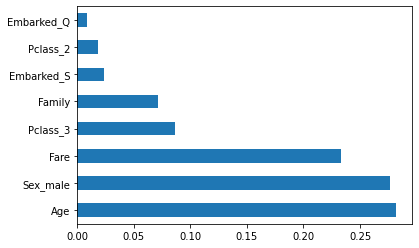

In [491]:
# Compute what features contribute the most towards a passenger's survival
from sklearn.ensemble import ExtraTreesClassifier
feature_model = ExtraTreesClassifier()
feature_model.fit(X,y)

feature_importance = pd.Series(feature_model.feature_importances_, index=X.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.show()

Seems like the price of the ticket, the passenger's age, sex and them being lower-class or not play a huge part in determining their survival.

### 3.2. Splitting into Training and Testing Data

In [492]:
# Since we have been given a separate csv for test data, we dont need to divide our df into train and test sets.

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [493]:
# X_train.head()


In [494]:
# X_train.shape

## 4. Building and Training a Model

## 5. Predict on Test Data

## 6. Metrics for Accuracy and Performance

In [495]:
# from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# print(confusion_matrix(y_test, y_pred))
# print(accuracy_score(y_test, y_pred))
# print(classification_report(y_test, y_pred))